In [2]:
# Import and configuration
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from config import *

In [3]:
# Load clean data from CSV
incident_data = pd.read_csv(incidents_clean_data_path)
incident_data.head()

,Year,State Name,Number of Killed,Number of Injured,Incident Info,Latitude,Longitude,Participant Age,Participant Age Group,Participant Gender,Participant Relationship,Participant Status,Participant Type,State Abbr
0,2013,Pennsylvania,0,4,Shot - Wounded/Injured||Mass Shooting (4+ vict...,40.3467,-79.8559,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,PA
1,2013,California,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",33.9090,-118.3330,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,CA
2,2013,Ohio,1,3,"Shot - Wounded/Injured||Shot - Dead (murder, a...",41.4455,-82.1377,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,OH
3,2013,Colorado,4,0,"Shot - Dead (murder, accidental, suicide)||Off...",39.6518,-104.8020,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,CO
4,2013,North Carolina,2,2,"Shot - Wounded/Injured||Shot - Dead (murder, a...",36.1140,-79.9569,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,NC


In [6]:
#Read in State_Star_Dict
Star_Dict = pd.read_csv(dict_path)

Star_Dict.head()

,Star State,Stars
0,Alabama,4
1,Alaska,5
2,Arizona,5
3,Arkansas,3
4,California,1


In [14]:
#Unique value count of state values so I can scatterplot against star count
incident_count = incident_data['State Name'].value_counts()
incident_count.head()

Illinois      17556
California    16306
Florida       15029
Texas         13577
Ohio          10244
Name: State Name, dtype: int64

In [15]:
#create incident count dataframe and rename columns
State_incident_count.df = pd.DataFrame(incident_count.reset_index())
State_incident_count.df.columns = ['Star State','Incident Count']
State_incident_count.df.head()

,Star State,Incident Count
0,Illinois,17556
1,California,16306
2,Florida,15029
3,Texas,13577
4,Ohio,10244


In [17]:
#Merge State Incident DF with Star Dict
Law_Data = pd.merge(Star_Dict, State_incident_count.df, how ="left", on ="Star State")
Law_Data.head()

,Star State,Stars,Incident Count
0,Alabama,4,5471
1,Alaska,5,1349
2,Arizona,5,2328
3,Arkansas,3,2842
4,California,1,16306


In [ ]:
#output Law_data to .csv

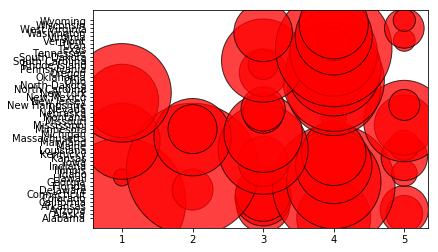

In [13]:
#Do a Scatter Plot
x_star_axis = Law_Data['Stars']
y_state_axis = Law_Data['Star State']
size_incident = Law_Data['Incident Count']
plt.scatter(x_star_axis, y_state_axis, marker="o", facecolors="red", edgecolors="black",
            s=size_incident, alpha=0.75)
plt.show()

In [27]:
Law_Data.head()


,Star State,Stars,Incident Count
0,Alabama,4,5471
1,Alaska,5,1349
2,Arizona,5,2328
3,Arkansas,3,2842
4,California,1,16306


In [ ]:
#make a per capita chart on stars vs per capita incidents
#y axis is average incidents per capita x is number of stars
#take the population for each state and get incidents per capita


In [33]:
#make a bar chart total incidents in each gro
#twerate through each row of law data and get a total for each star group like in PyPoll
one_star_incident_count = 0
two_star_incident_count = 0
three_star_incident_count = 0
four_star_incident_count = 0
five_star_incident_count = 0

for row in Law_Data:
        #vote_count = vote_count + 1
        if row[3]== 1:
            one_star_incident_count = one_star_incident_count + 1
        if row[3]== 2:
            two_star_incident_count = two_star_incident_count + 1
        if row[3]== 3:
            three_star_incident_count = three_star_incident_count + 1
        if row[3]== 4:
            four_star_incident_count = four_star_incident_count + 1
        if row[3]== 5:
            five_star_incident_count = five_star_incident_count + 1
            